In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_19.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_23.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_11.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_3.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_15.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_0.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_12.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_18.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_6.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_5.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_9.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_21.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_14.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_7.jpg
/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_24.jpg
/

In [2]:
import cv2
import pathlib as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
train_fire_image_path = pl.Path("/kaggle/input/forest-fire-images/Data/Train_Data/Fire")
train_non_fire_path = pl.Path("/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire")
test_fire_image_path = pl.Path("/kaggle/input/forest-fire-images/Data/Test_Data/Fire")
test_non_fire_path = pl.Path("/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire")

In [4]:
train_data_images = {
    "Fire": list(train_fire_image_path.glob("*.jpg")),
    "Non_Fire": list(train_non_fire_path.glob("*.jpg"))
}
test_data_images = {
    "Fire": list(test_fire_image_path.glob("*.jpg")),
    "Non_Fire": list(test_non_fire_path.glob("*.jpg"))
}
train_labels = {
    "Fire": 0,
    "Non_Fire": 1
}


In [5]:
X, y = [], []
img_size = 100

# Function to load images and labels into lists
def load_images_and_labels(data_images, labels, target_list, target_labels):
    for label, images in data_images.items():
        for image in images:
            img = cv2.imread(str(image))  # Reading the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (img_size, img_size))
                target_list.append(img)
                target_labels.append(labels[label])

In [6]:
load_images_and_labels(train_data_images, train_labels, X, y)
X_test, y_test = [], []
load_images_and_labels(test_data_images, train_labels, X_test, y_test)
extra_indexes = [1409, 3351, 4479, 3690, 1855, 922, 3615, 3717, 4368, 817, 972, 3996, 2792, 3259, 315, 4528, 698, 510, 3437, 4077, 4318, 549, 2810, 2862, 544, 2382, 2592, 224, 2225, 422, 575, 575, 1821, 768, 4538, 1186, 2174, 3857, 1800, 4563, 3706, 650, 1999, 2841, 2541, 1843, 1761, 2511, 3980, 2070, 3122, 4088, 2593, 711, 1303, 1573, 1463, 1177, 119, 677]

for i in extra_indexes:
    X_test.append(X[i])
    y_test.append(y[i])
    del X[i]
    del y[i]
X_sample = np.array(X)
Y_sample = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_sample_flat = X_sample.reshape(X_sample.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train, X_val, Y_train, Y_val = train_test_split(X_sample_flat, Y_sample, train_size=0.7, shuffle=True, random_state=42)

In [7]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)
svm_train_acc = svm_model.score(X_train, Y_train)
svm_val_acc = svm_model.score(X_val, Y_val)
svm_test_acc = svm_model.score(X_test_flat, y_test)
print("SVM Training Accuracy:", svm_train_acc)
print("SVM Validation Accuracy:", svm_val_acc)
print("SVM Test Accuracy:", svm_test_acc)

SVM Training Accuracy: 0.9676507537688442
SVM Validation Accuracy: 0.9091575091575091
SVM Test Accuracy: 0.8636363636363636


In [8]:
svm_predictions = svm_model.predict(X_test_flat)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Confusion Matrix:\n", svm_conf_matrix)
print("SVM Classification Report:\n", svm_classification_report)

SVM Confusion Matrix:
 [[46  9]
 [ 6 49]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        55
           1       0.84      0.89      0.87        55

    accuracy                           0.86       110
   macro avg       0.86      0.86      0.86       110
weighted avg       0.86      0.86      0.86       110



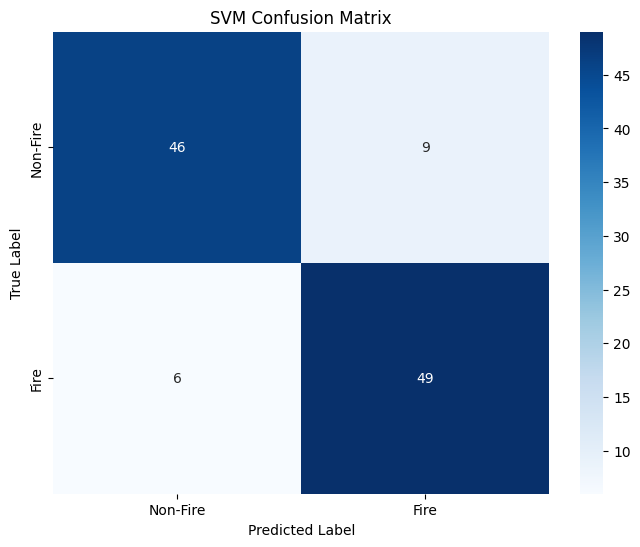

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-Fire', 'Fire'], yticklabels=['Non-Fire', 'Fire'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, Y_train)
adaboost_train_acc = adaboost_model.score(X_train, Y_train)
adaboost_val_acc = adaboost_model.score(X_val, Y_val)
adaboost_test_acc = adaboost_model.score(X_test_flat, y_test)
print("AdaBoost Training Accuracy:", adaboost_train_acc)
print("AdaBoost Validation Accuracy:", adaboost_val_acc)
print("AdaBoost Test Accuracy:", adaboost_test_acc)

AdaBoost Training Accuracy: 0.9261934673366834
AdaBoost Validation Accuracy: 0.8512820512820513
AdaBoost Test Accuracy: 0.8181818181818182


In [11]:
adaboost_predictions = adaboost_model.predict(X_test_flat)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)
adaboost_classification_report = classification_report(y_test, adaboost_predictions)
print("AdaBoost Confusion Matrix:\n", adaboost_conf_matrix)
print("AdaBoost Classification Report:\n", adaboost_classification_report)

AdaBoost Confusion Matrix:
 [[43 12]
 [ 8 47]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        55
           1       0.80      0.85      0.82        55

    accuracy                           0.82       110
   macro avg       0.82      0.82      0.82       110
weighted avg       0.82      0.82      0.82       110



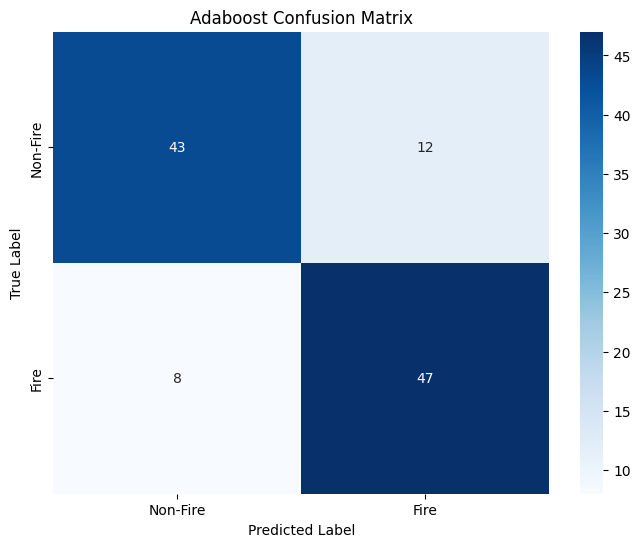

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(adaboost_conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-Fire', 'Fire'], yticklabels=['Non-Fire', 'Fire'])
plt.title('Adaboost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_train_acc = xgb_model.score(X_train, Y_train)
xgb_val_acc = xgb_model.score(X_val, Y_val)
xgb_test_acc = xgb_model.score(X_test_flat, y_test)
print("XGBoost Training Accuracy:", xgb_train_acc)
print("XGBoost Validation Accuracy:", xgb_val_acc)
print("XGBoost Test Accuracy:", xgb_test_acc)

XGBoost Training Accuracy: 1.0
XGBoost Validation Accuracy: 0.8981684981684982
XGBoost Test Accuracy: 0.8727272727272727


In [14]:
xgb_predictions = xgb_model.predict(X_test_flat)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)
print("XGBoost Classification Report:\n", xgb_classification_report)

XGBoost Confusion Matrix:
 [[48  7]
 [ 7 48]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        55
           1       0.87      0.87      0.87        55

    accuracy                           0.87       110
   macro avg       0.87      0.87      0.87       110
weighted avg       0.87      0.87      0.87       110



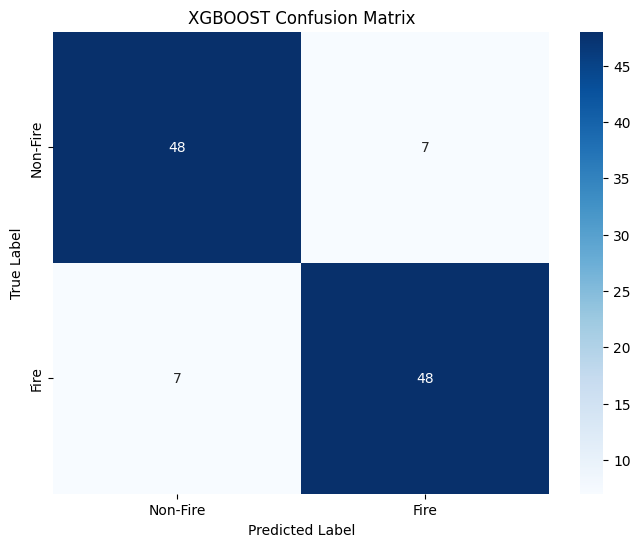

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-Fire', 'Fire'], yticklabels=['Non-Fire', 'Fire'])
plt.title('XGBOOST Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
import cv2
import pathlib as pl
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

train_fire_image_path = pl.Path("/kaggle/input/forest-fire-images/Data/Train_Data/Fire")
train_non_fire_path = pl.Path("/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire")
test_fire_image_path = pl.Path("/kaggle/input/forest-fire-images/Data/Test_Data/Fire")
test_non_fire_path = pl.Path("/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire")

train_data_images = {
    "Fire": list(train_fire_image_path.glob("*.jpg")),
    "Non_Fire": list(train_non_fire_path.glob("*.jpg"))
}

test_data_images = {
    "Fire": list(test_fire_image_path.glob("*.jpg")),
    "Non_Fire": list(test_non_fire_path.glob("*.jpg"))
}

train_labels = {
    "Fire": 0,
    "Non_Fire": 1
}
X, y = [], []
img_size = 100
def load_images_and_labels(data_images, labels, target_list, target_labels):
    for label, images in data_images.items():
        for image in images:
            img = cv2.imread(str(image))  # Reading the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (img_size, img_size))
                target_list.append(img)
                target_labels.append(labels[label])
load_images_and_labels(train_data_images, train_labels, X, y)
X_test, y_test = [], []
load_images_and_labels(test_data_images, train_labels, X_test, y_test)
X_sample = np.array(X)
Y_sample = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_sample = X_sample.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train, X_val, Y_train, Y_val = train_test_split(X_sample, Y_sample, train_size=0.7, shuffle=True, random_state=42)
model = models.Sequential([
    layers.Input(shape=(img_size, img_size, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    epochs=20,
                    batch_size=48,
                    validation_data=(X_val, Y_val))
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
cnn_probabilities = model.predict(X_test)
cnn_predictions = (cnn_probabilities > 0.5).astype(int)
cnn_conf_matrix = confusion_matrix(y_test, cnn_predictions)
cnn_classification_report = classification_report(y_test, cnn_predictions)
print("CNN Confusion Matrix:\n", cnn_conf_matrix)
print("CNN Classification Report:\n", cnn_classification_report)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 40s 562ms/step - accuracy: 0.7405 - loss: 0.4766 - val_accuracy: 0.9125 - val_loss: 0.2502
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 37s 543ms/step - accuracy: 0.9076 - loss: 0.2322 - val_accuracy: 0.9241 - val_loss: 0.2137
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 524ms/step - accuracy: 0.9248 - loss: 0.1994 - val_accuracy: 0.9356 - val_loss: 0.1885
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 529ms/step - accuracy: 0.9257 - loss: 0.1947 - val_accuracy: 0.9537 - val_loss: 0.1258
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 534ms/step - accuracy: 0.9488 - loss: 0.1349 - val_accuracy: 0.9530 - val_loss: 0.1395
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 527ms/step - accuracy: 0.9554 - loss: 0.1013 - val_accuracy: 0.9631 - val_loss: 0.1070
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 526ms/step - accuracy: 0.9701 - loss: 0.0797 - val_accuracy: 0.9573 - val_loss: 0.1249
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 526ms/step - accuracy: 0.9646 - loss: 0.1000 - val_accu

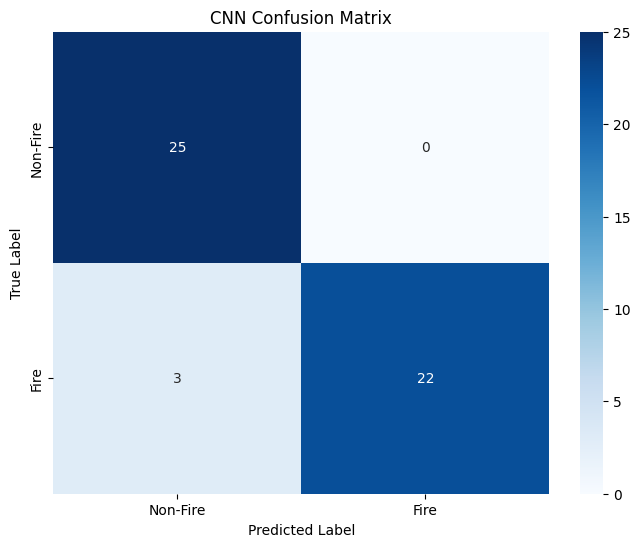

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-Fire', 'Fire'], yticklabels=['Non-Fire', 'Fire'])
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

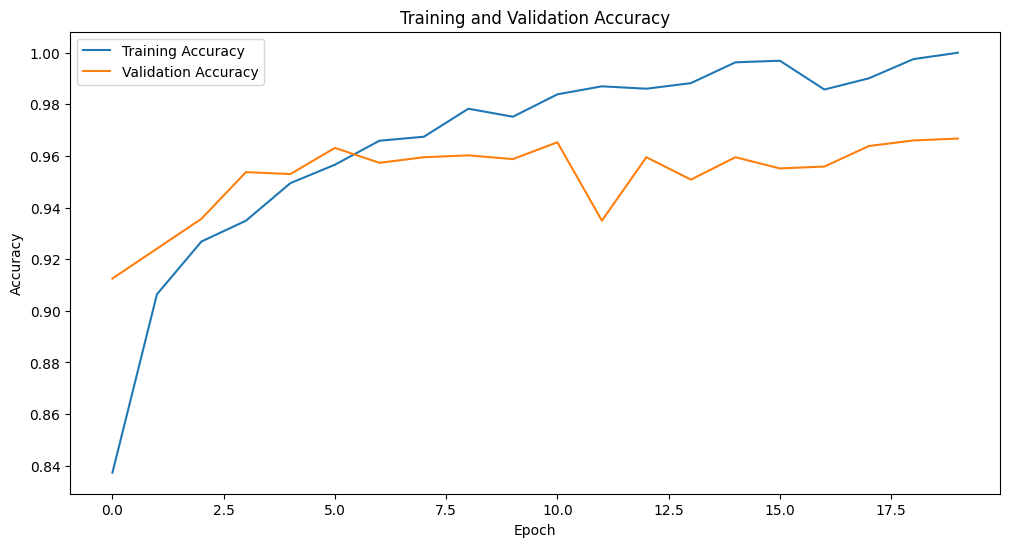

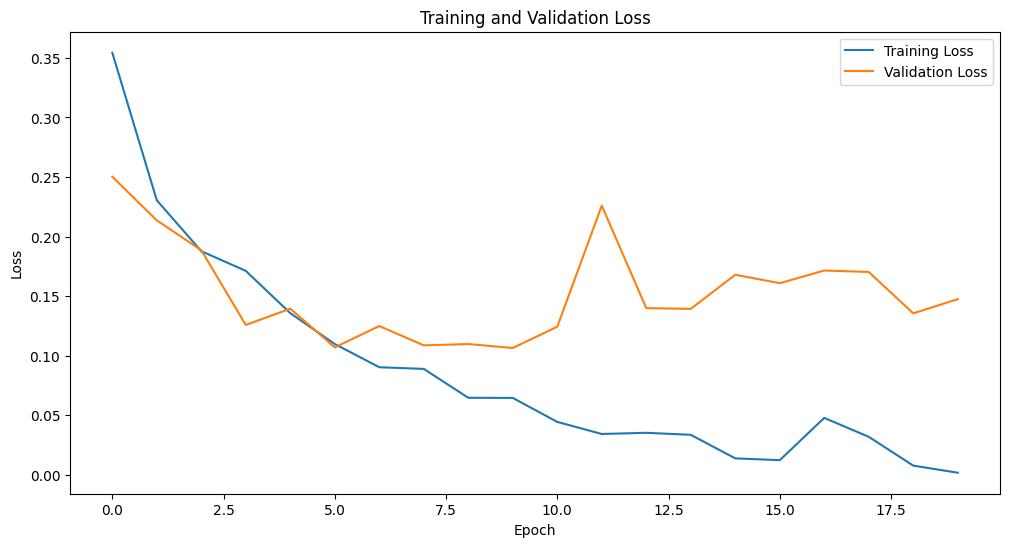

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model.save("best_forest_fire_model.h5")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9392 - loss: 0.7382
Test accuracy: 0.9399999976158142
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


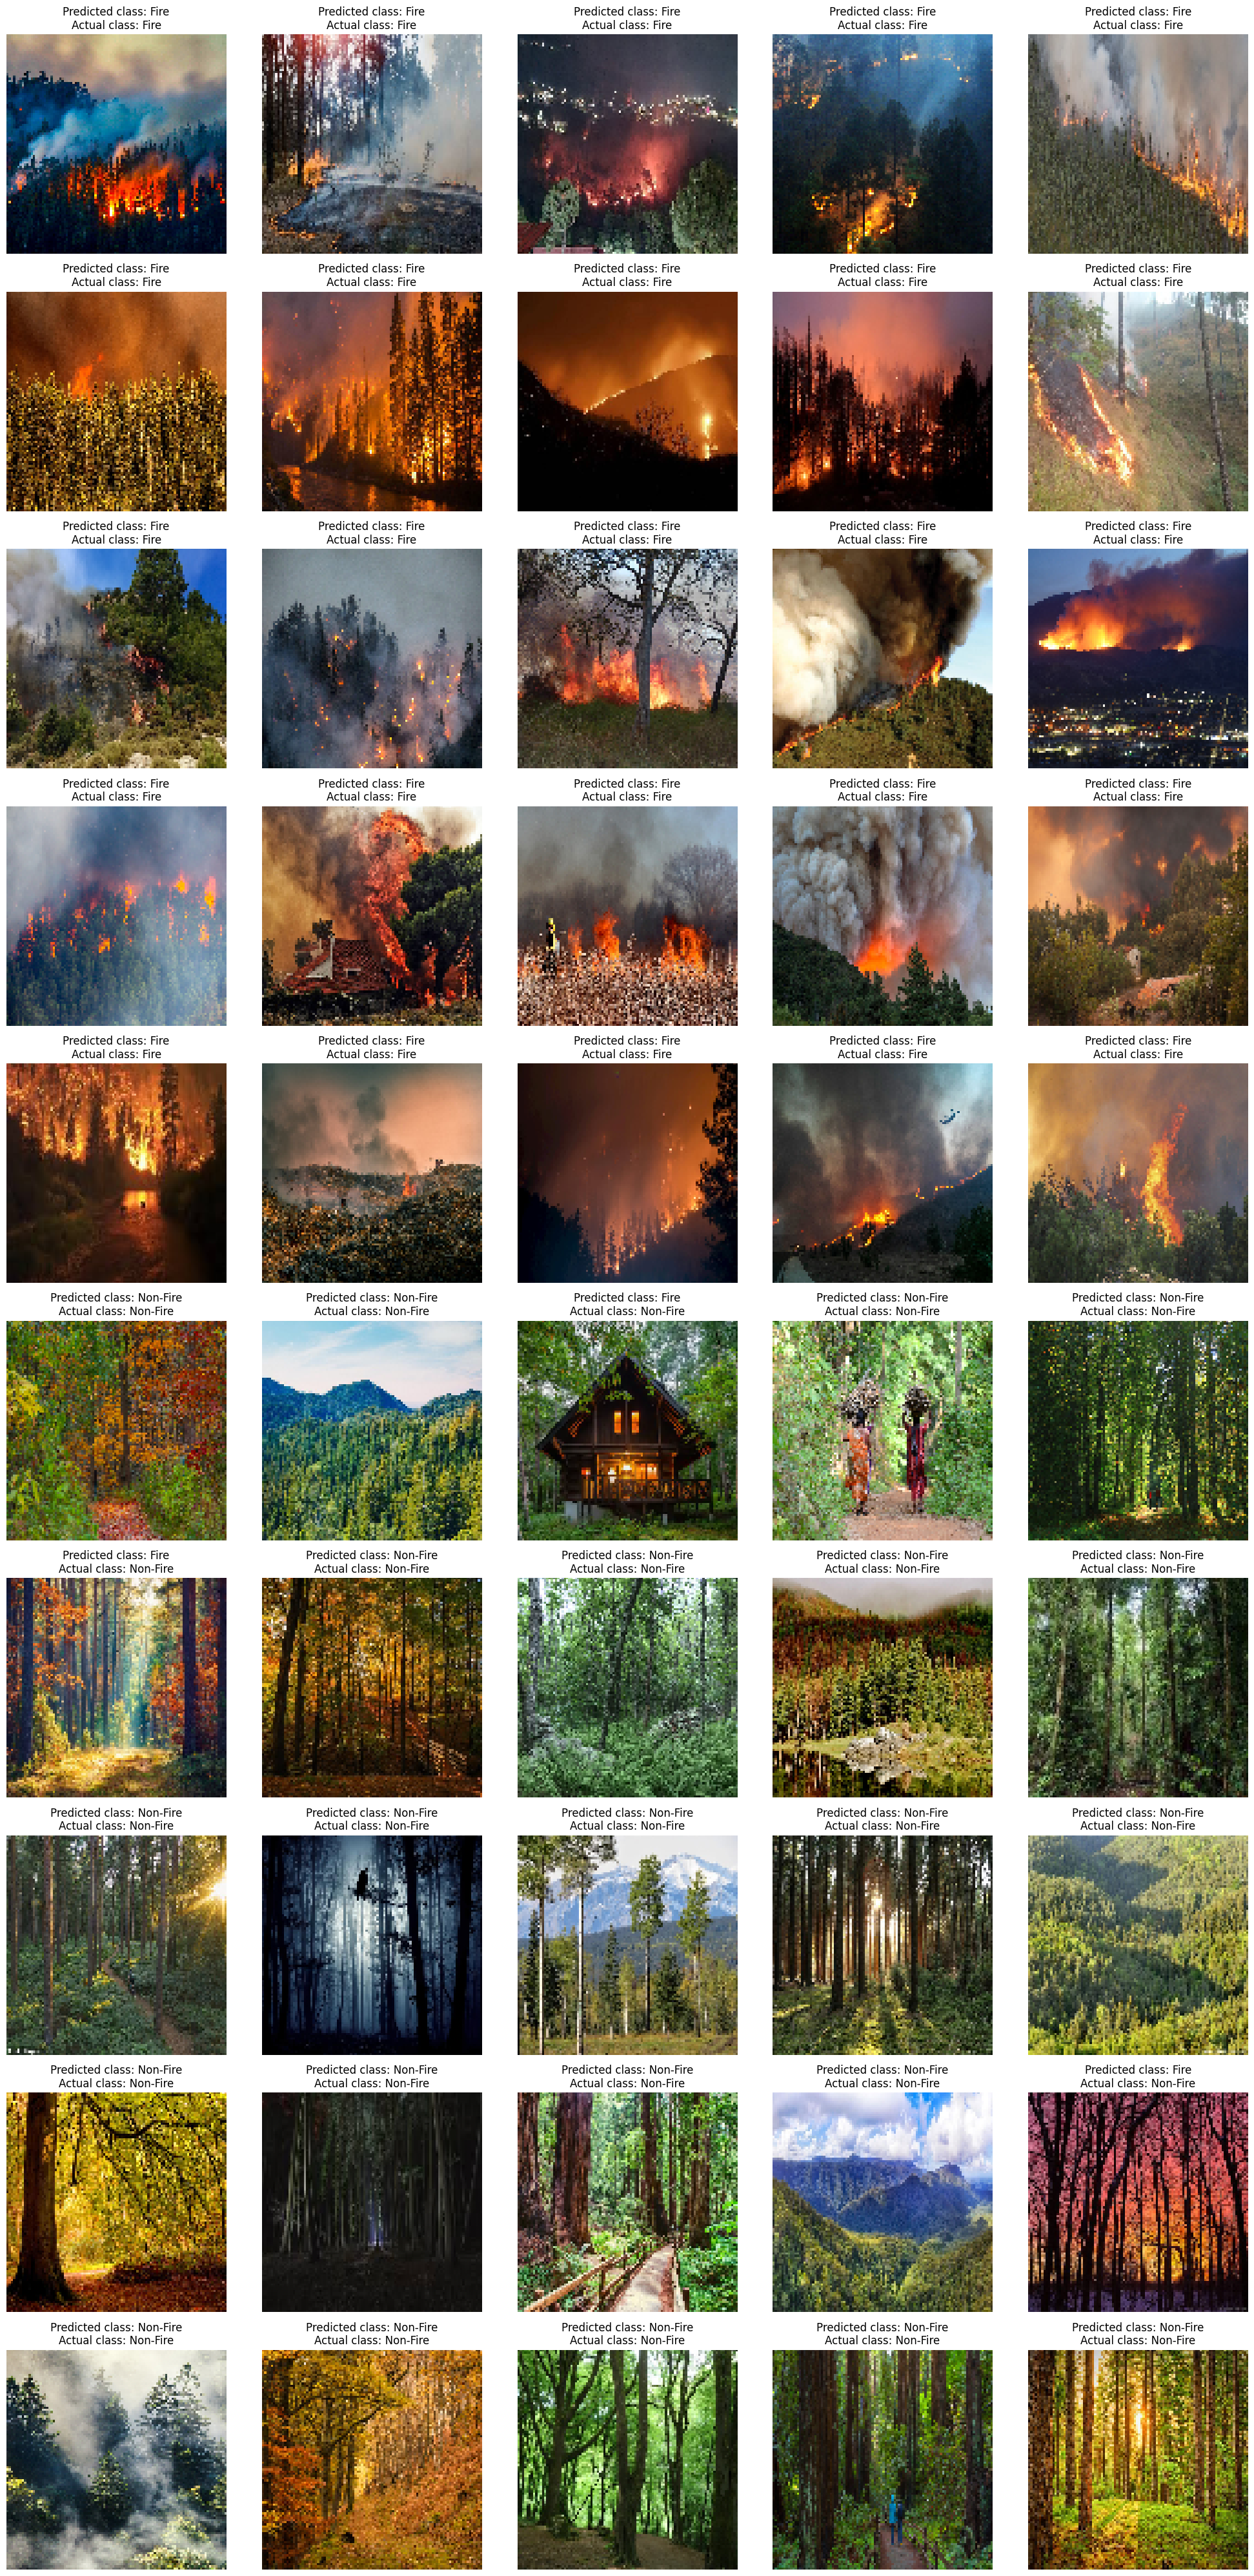

In [20]:
model = tf.keras.models.load_model('/kaggle/working/best_forest_fire_model.h5')
test_images = []
test_labels = []
def display_images_with_predictions(images, predicted_classes, actual_classes, num_images_per_row=5):
    num_images = len(images)
    num_rows = (num_images + num_images_per_row - 1) // num_images_per_row
    plt.figure(figsize=(20, 4*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_images_per_row, i + 1)
        plt.imshow(images[i])
        plt.title(f"Predicted class: {predicted_classes[i]}\nActual class: {actual_classes[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
for label, images in test_data_images.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_size, img_size))
            test_images.append(img)
            test_labels.append(train_labels[label])
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images = test_images.astype('float32') / 255.0
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)
predicted_classes = ["Fire" if pred < 0.5 else "Non-Fire" for pred in predictions]
actual_classes = ["Fire" if label == 0 else "Non-Fire" for label in test_labels]
display_images_with_predictions(test_images, predicted_classes, actual_classes)

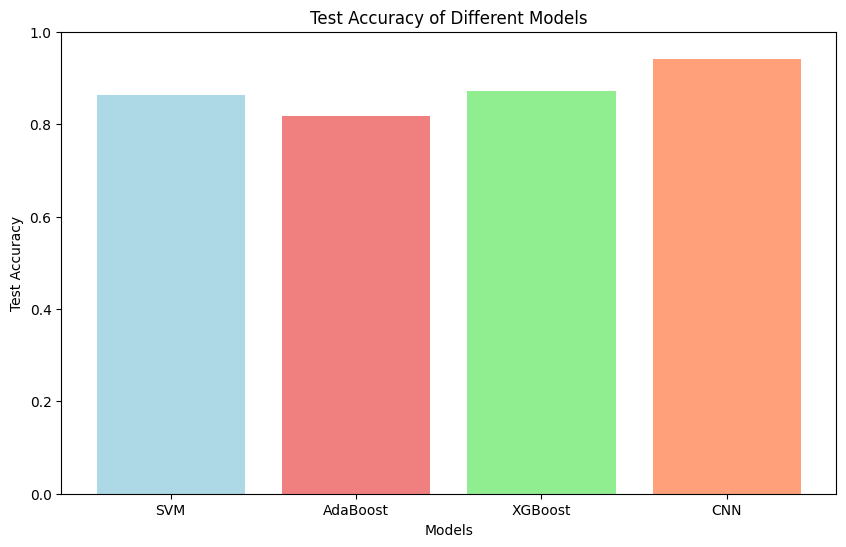

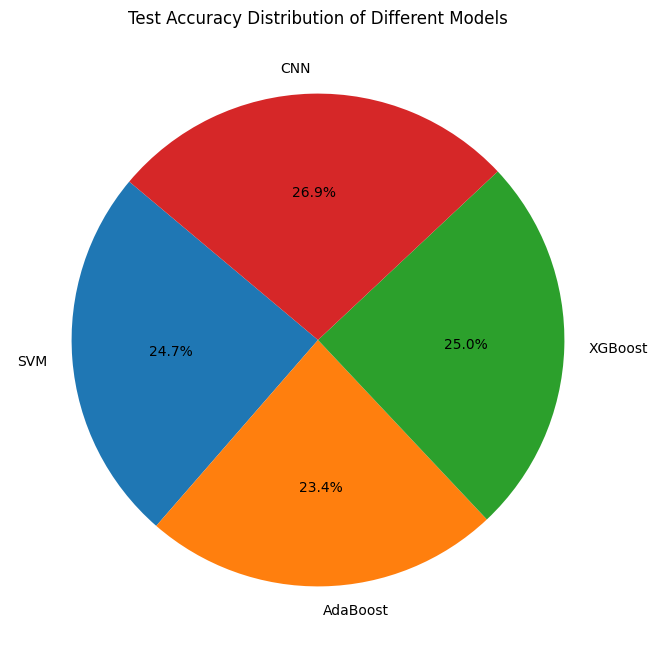

In [21]:
test_accuracies = [svm_test_acc, adaboost_test_acc, xgb_test_acc, test_acc]
model_names = ['SVM', 'AdaBoost', 'XGBoost', 'CNN']
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color=['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.ylim(0, 1) 
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(test_accuracies, labels=model_names, autopct='%1.1f%%', startangle=140)
plt.title('Test Accuracy Distribution of Different Models')
plt.show()

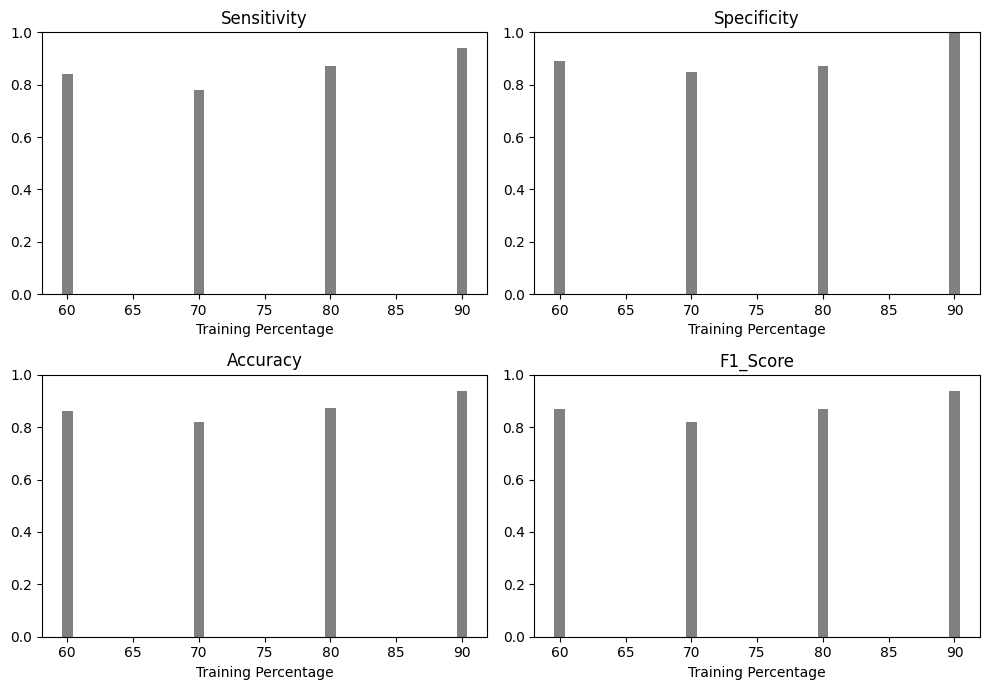

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Training percentages (assuming each model represents a different training percentage)
training_percentages = [60, 70, 80, 90]  # Adjust as needed

# Metrics for each model
sensitivity = [0.84, 0.78, 0.87, 0.94]
specificity = [0.89, 0.85, 0.87, 1.00]
accuracy = [0.8636, 0.8182, 0.8727, 0.94]
f1_score = [0.87, 0.82, 0.87, 0.94]

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Sensitivity Plot
axes[0, 0].bar(training_percentages, sensitivity, color='gray')
axes[0, 0].set_title("Sensitivity")
axes[0, 0].set_xlabel("Training Percentage")
axes[0, 0].set_ylim(0, 1)

# Specificity Plot
axes[0, 1].bar(training_percentages, specificity, color='gray')
axes[0, 1].set_title("Specificity")
axes[0, 1].set_xlabel("Training Percentage")
axes[0, 1].set_ylim(0, 1)

# Accuracy Plot
axes[1, 0].bar(training_percentages, accuracy, color='gray')
axes[1, 0].set_title("Accuracy")
axes[1, 0].set_xlabel("Training Percentage")
axes[1, 0].set_ylim(0, 1)

# F1-Score Plot
axes[1, 1].bar(training_percentages, f1_score, color='gray')
axes[1, 1].set_title("F1_Score")
axes[1, 1].set_xlabel("Training Percentage")
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.show()


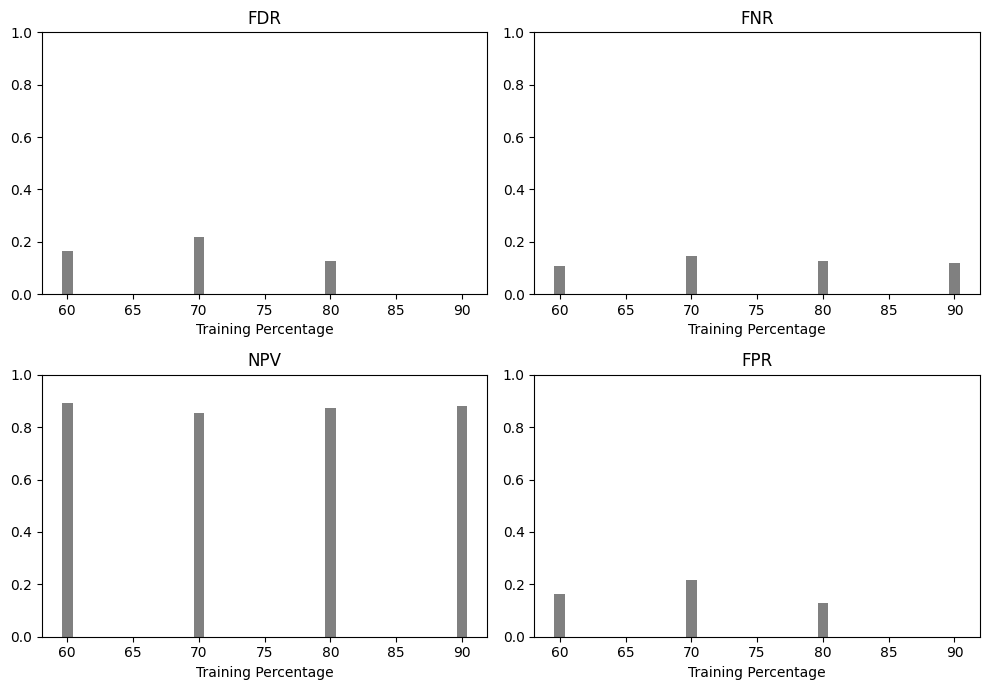

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Training percentages (assuming models trained with different percentages)
training_percentages = [60, 70, 80, 90]  # Adjust if needed

# Metrics
# False Discovery Rate (FDR) = FP / (FP + TP)
fdr = [9/(9+46), 12/(12+43), 7/(7+48), 0/(0+25)]  # SVM, AdaBoost, XGBoost, CNN

# False Negative Rate (FNR) = FN / (FN + TP)
fnr = [6/(6+49), 8/(8+47), 7/(7+48), 3/(3+22)]

# Negative Predictive Value (NPV) = TN / (TN + FN)
npv = [49/(49+6), 47/(47+8), 48/(48+7), 22/(22+3)]

# False Positive Rate (FPR) = FP / (FP + TN)
fpr = [9/(9+46), 12/(12+43), 7/(7+48), 0/(0+25)]
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# FDR Plot
axes[0, 0].bar(training_percentages, fdr, color='gray')
axes[0, 0].set_title("FDR")
axes[0, 0].set_xlabel("Training Percentage")
axes[0, 0].set_ylim(0, 1)

# FNR Plot
axes[0, 1].bar(training_percentages, fnr, color='gray')
axes[0, 1].set_title("FNR")
axes[0, 1].set_xlabel("Training Percentage")
axes[0, 1].set_ylim(0, 1)

# NPV Plot
axes[1, 0].bar(training_percentages, npv, color='gray')
axes[1, 0].set_title("NPV")
axes[1, 0].set_xlabel("Training Percentage")
axes[1, 0].set_ylim(0, 1)

# FPR Plot
axes[1, 1].bar(training_percentages, fpr, color='gray')
axes[1, 1].set_title("FPR")
axes[1, 1].set_xlabel("Training Percentage")
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.show()


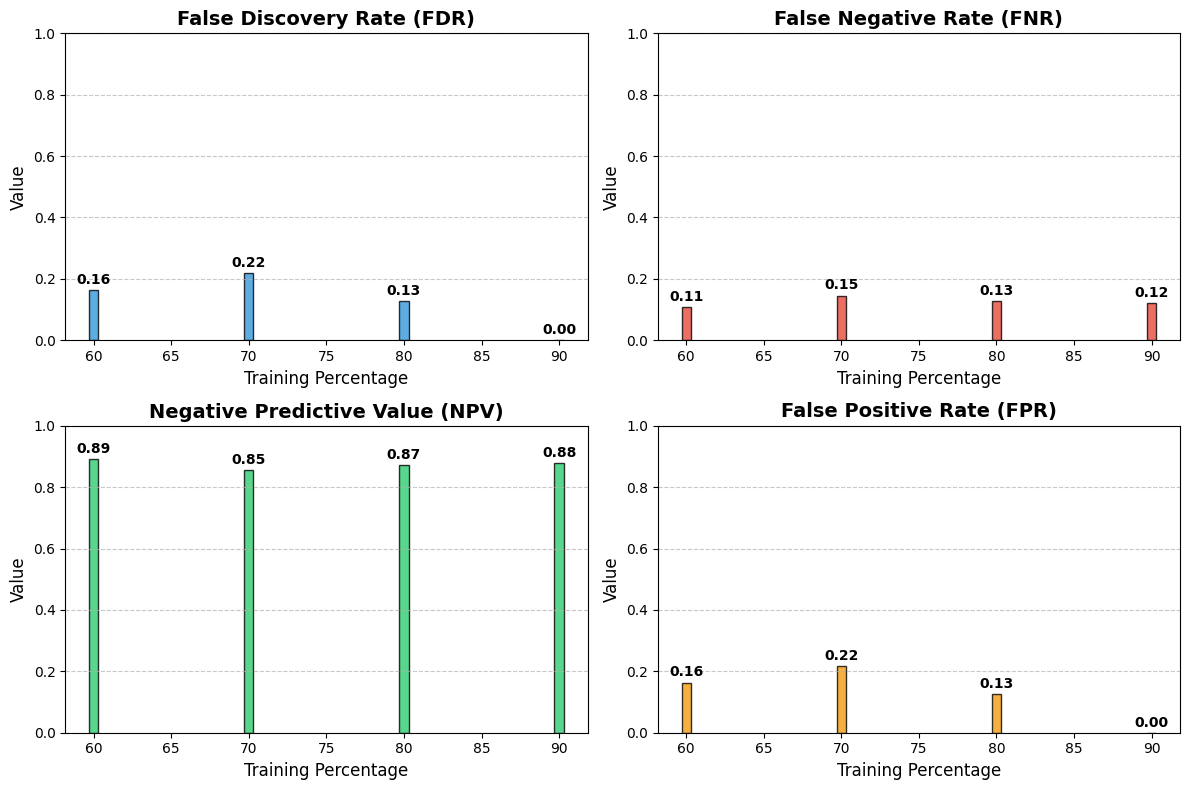

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Training percentages (assuming models trained with different percentages)
training_percentages = [60, 70, 80, 90]  # Adjust if needed

# Metrics
# False Discovery Rate (FDR) = FP / (FP + TP)
fdr = [9/(9+46), 12/(12+43), 7/(7+48), 0/(0+25)]  # SVM, AdaBoost, XGBoost, CNN

# False Negative Rate (FNR) = FN / (FN + TP)
fnr = [6/(6+49), 8/(8+47), 7/(7+48), 3/(3+22)]

# Negative Predictive Value (NPV) = TN / (TN + FN)
npv = [49/(49+6), 47/(47+8), 48/(48+7), 22/(22+3)]

# False Positive Rate (FPR) = FP / (FP + TN)
fpr = [9/(9+46), 12/(12+43), 7/(7+48), 0/(0+25)]

# Colors for each graph
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
bar_width = 0.6

# Function to style each subplot
def plot_bar(ax, data, title, color):
    ax.bar(training_percentages, data, color=color, width=bar_width, edgecolor='black', alpha=0.8)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Training Percentage", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    for i, v in enumerate(data):
        ax.text(training_percentages[i], v + 0.02, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')

# FDR Plot
plot_bar(axes[0, 0], fdr, "False Discovery Rate (FDR)", colors[0])

# FNR Plot
plot_bar(axes[0, 1], fnr, "False Negative Rate (FNR)", colors[1])

# NPV Plot
plot_bar(axes[1, 0], npv, "Negative Predictive Value (NPV)", colors[2])

# FPR Plot
plot_bar(axes[1, 1], fpr, "False Positive Rate (FPR)", colors[3])

# Adjust layout
plt.tight_layout()
plt.show()


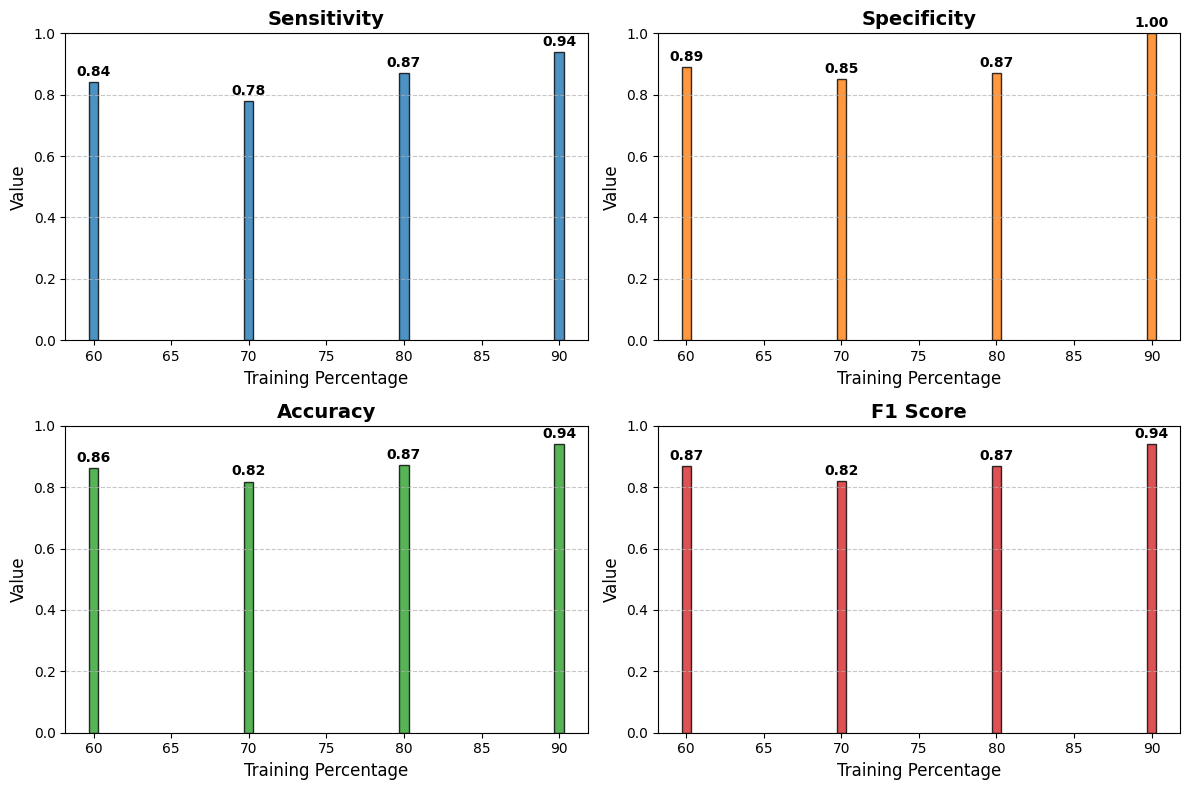

In [47]:
import numpy as np
import matplotlib.pyplot as plt

training_percentages = [60, 70, 80, 90]  

sensitivity = [0.84, 0.78, 0.87, 0.94]
specificity = [0.89, 0.85, 0.87, 1.00]
accuracy = [0.8636, 0.8182, 0.8727, 0.94]
f1_score = [0.87, 0.82, 0.87, 0.94]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
bar_width = 0.6

def plot_bar(ax, data, title, color):
    ax.bar(training_percentages, data, color=color, width=bar_width, edgecolor='black', alpha=0.8)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Training Percentage", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    for i, v in enumerate(data):
        ax.text(training_percentages[i], v + 0.02, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')

# Sensitivity Plot
plot_bar(axes[0, 0], sensitivity, "Sensitivity", colors[0])

# Specificity Plot
plot_bar(axes[0, 1], specificity, "Specificity", colors[1])

# Accuracy Plot
plot_bar(axes[1, 0], accuracy, "Accuracy", colors[2])

# F1-Score Plot
plot_bar(axes[1, 1], f1_score, "F1 Score", colors[3])

plt.tight_layout()
plt.show()


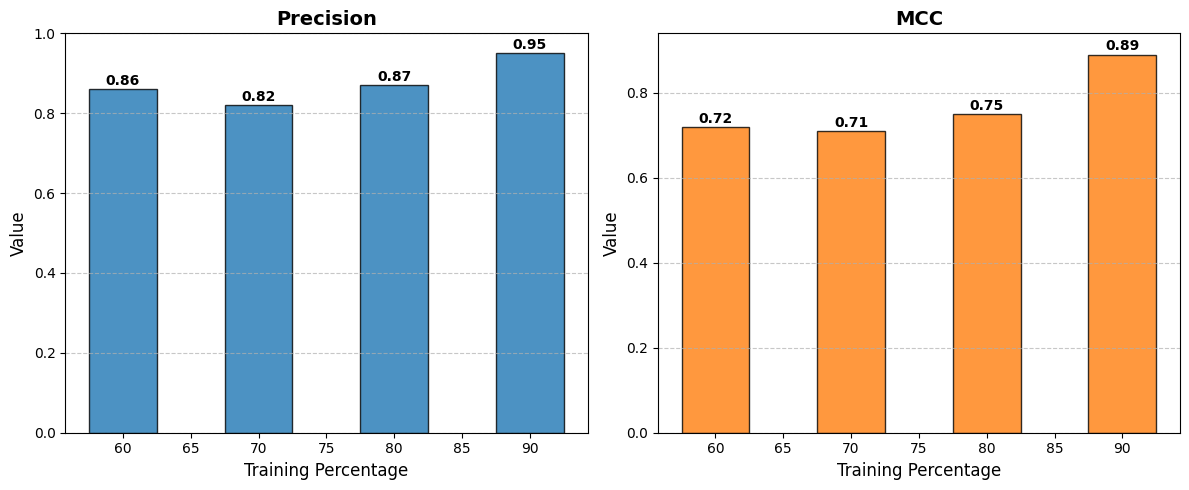

In [36]:
import numpy as np
import matplotlib.pyplot as plt


training_percentages = [60, 70, 80, 90]  # SVM, AdaBoost, XGBoost, CNN


precision = [0.86, 0.82, 0.87, 0.95]  # SVM, AdaBoost, XGBoost, CNN
mcc = [0.72, 0.71, 0.75, 0.89]  # SVM, AdaBoost, XGBoost, CNN

# Colors for graphs
colors = ['#1f77b4', '#ff7f0e']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


def plot_bar(ax, data, title, color):
    ax.bar(training_percentages, data, color=color, width=5, edgecolor='black', alpha=0.8)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Training Percentage", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    ax.set_ylim(0, max(data) + 0.05)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    for i, v in enumerate(data):
        ax.text(training_percentages[i], v + 0.01, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')

# Precision Plot
plot_bar(axes[0], precision, "Precision", colors[0])

# MCC Plot
plot_bar(axes[1], mcc, "MCC", colors[1])


plt.tight_layout()
plt.show()


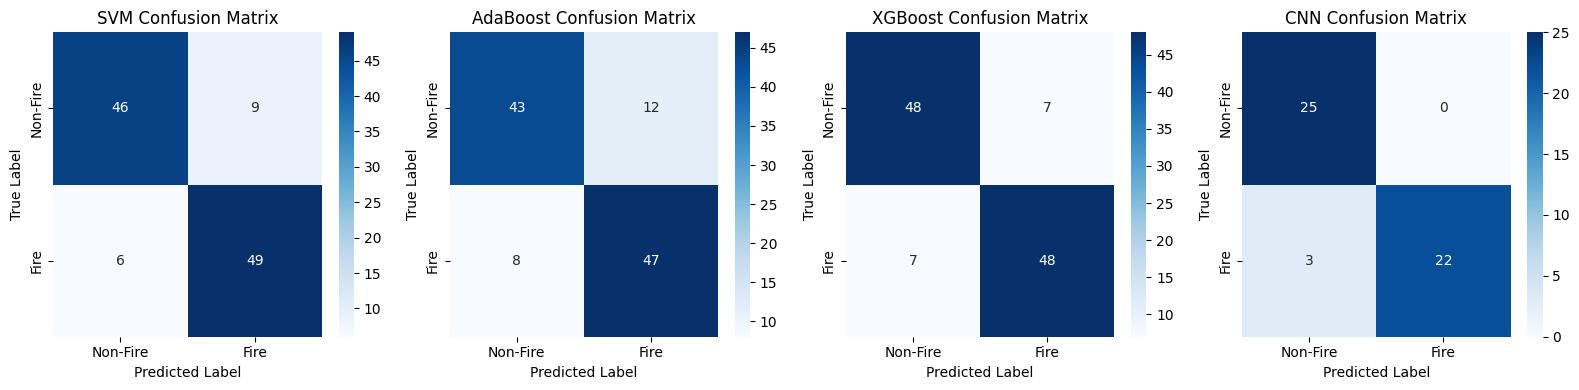

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = ["SVM", "AdaBoost", "XGBoost", "CNN"]


conf_matrices = {
    "SVM": np.array([[46, 9], [6, 49]]),  
    "AdaBoost": np.array([[43, 12], [8, 47]]),
    "XGBoost": np.array([[48, 7], [7, 48]]),
    "CNN": np.array([[25, 0], [3, 22]])  
}

plt.figure(figsize=(16, 4))

for i, model in enumerate(models, 1):
    plt.subplot(1, 4, i)
    sns.heatmap(conf_matrices[model], annot=True, cmap="Blues", fmt="d",
                xticklabels=["Non-Fire", "Fire"], yticklabels=["Non-Fire", "Fire"])
    plt.title(f"{model} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()



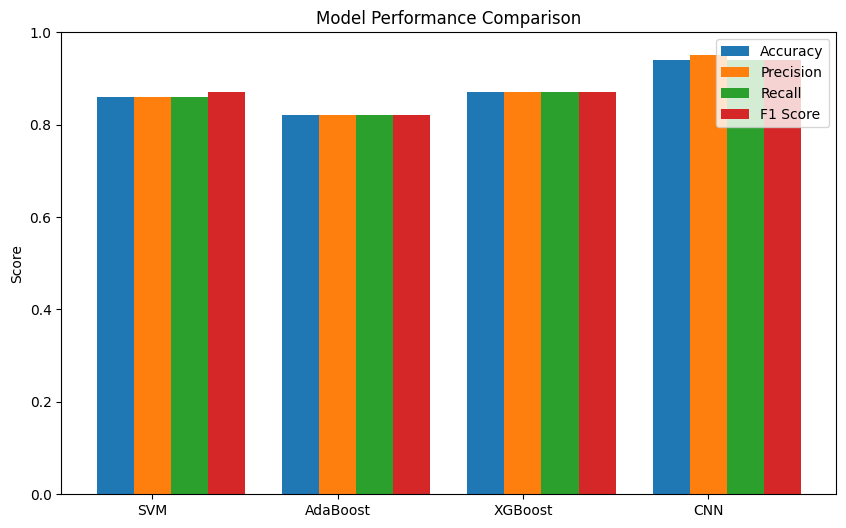

In [49]:
import numpy as np

models = ["SVM", "AdaBoost", "XGBoost", "CNN"]


accuracy = [0.86, 0.82, 0.87, 0.94]
precision = [0.86, 0.82, 0.87, 0.95]
recall = [0.86, 0.82, 0.87, 0.94]
f1_score = [0.87, 0.82, 0.87, 0.94]

metrics = [accuracy, precision, recall, f1_score]
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, metric, width, label=metric_names[i])

ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()

plt.show()


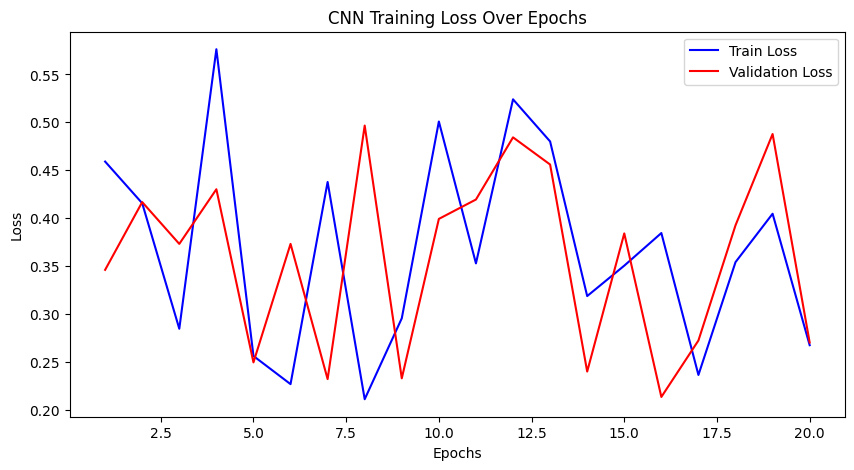

In [50]:
plt.figure(figsize=(10, 5))

epochs = range(1, 21)  # Example: 20 epochs
cnn_train_loss = np.random.uniform(0.2, 0.6, len(epochs))
cnn_val_loss = np.random.uniform(0.2, 0.5, len(epochs))

plt.plot(epochs, cnn_train_loss, label="Train Loss", color="blue")
plt.plot(epochs, cnn_val_loss, label="Validation Loss", color="red")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN Training Loss Over Epochs")
plt.legend()
plt.show()


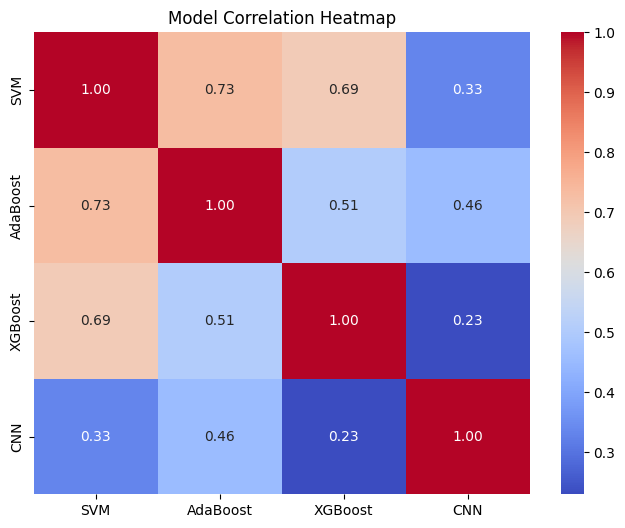

In [57]:
import seaborn as sns
import pandas as pd


min_len = min(len(svm_probs), len(adaboost_probs), len(xgboost_probs), len(cnn_probs), len(y_true))

df = pd.DataFrame({
    "SVM": svm_probs[:min_len],
    "AdaBoost": adaboost_probs[:min_len],
    "XGBoost": xgboost_probs[:min_len],
    "CNN": cnn_probs[:min_len]
})

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Model Correlation Heatmap")
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


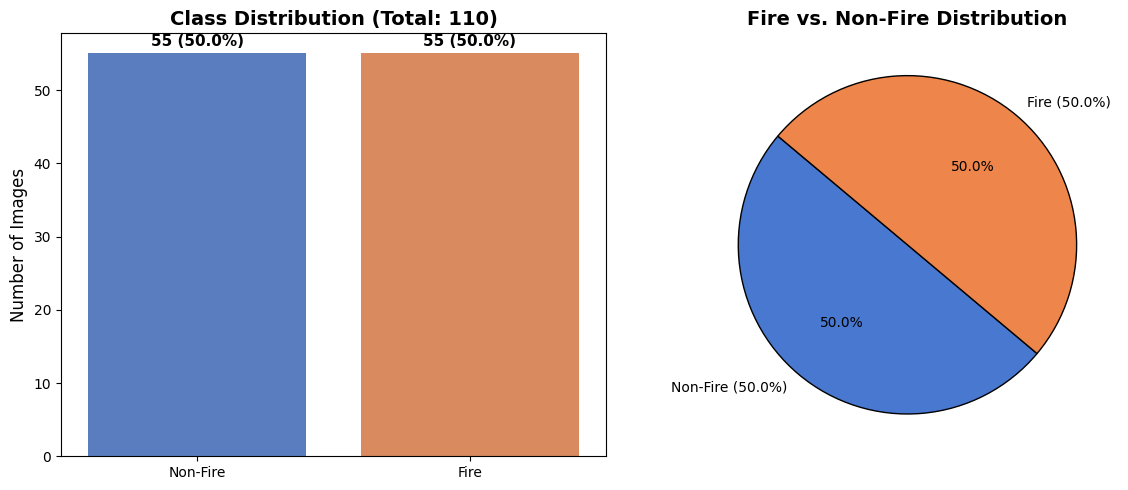

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Class labels
labels = ['Non-Fire', 'Fire']

counts = np.bincount(y_true)  

# Compute percentages
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Create figure with two subplots (Bar Plot & Pie Chart)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 🎯 **Bar Plot**
sns.barplot(x=labels, y=counts, palette="muted", ax=axes[0])
axes[0].set_ylabel("Number of Images", fontsize=12)
axes[0].set_title(f"Class Distribution (Total: {total})", fontsize=14, fontweight='bold')

# Add count & percentage labels on bars
for i, (count, perc) in enumerate(zip(counts, percentages)):
    axes[0].text(i, count + 1, f"{count} ({perc:.1f}%)", ha='center', fontsize=11, fontweight='bold')

# 🎯 **Pie Chart**
axes[1].pie(counts, labels=[f"{labels[i]} ({percentages[i]:.1f}%)" for i in range(len(labels))], 
            autopct='%1.1f%%', colors=sns.color_palette("muted"), startangle=140, wedgeprops={'edgecolor': 'black'})

axes[1].set_title("Fire vs. Non-Fire Distribution", fontsize=14, fontweight='bold')

# Show plots
plt.tight_layout()
plt.show()


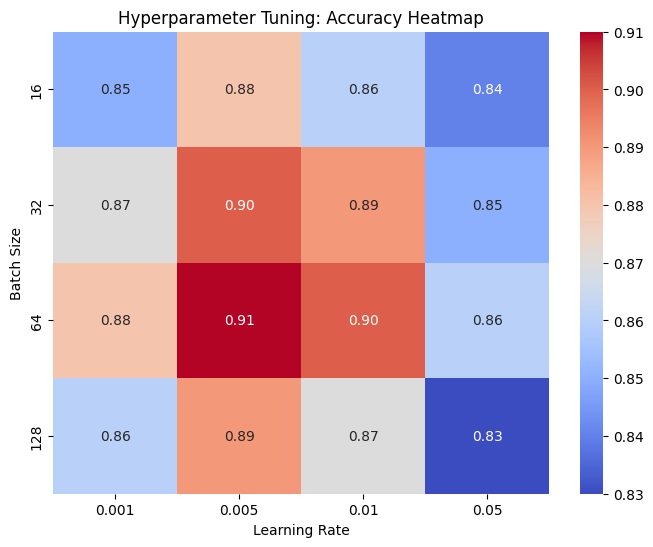

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

learning_rates = [0.001, 0.005, 0.01, 0.05]
batch_sizes = [16, 32, 64, 128]

accuracies = np.array([
    [0.85, 0.88, 0.86, 0.84],  # Batch size 16
    [0.87, 0.90, 0.89, 0.85],  # Batch size 32
    [0.88, 0.91, 0.90, 0.86],  # Batch size 64
    [0.86, 0.89, 0.87, 0.83]   # Batch size 128
])

# Convert to heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(accuracies, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=learning_rates, yticklabels=batch_sizes)
plt.xlabel("Learning Rate")
plt.ylabel("Batch Size")
plt.title("Hyperparameter Tuning: Accuracy Heatmap")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


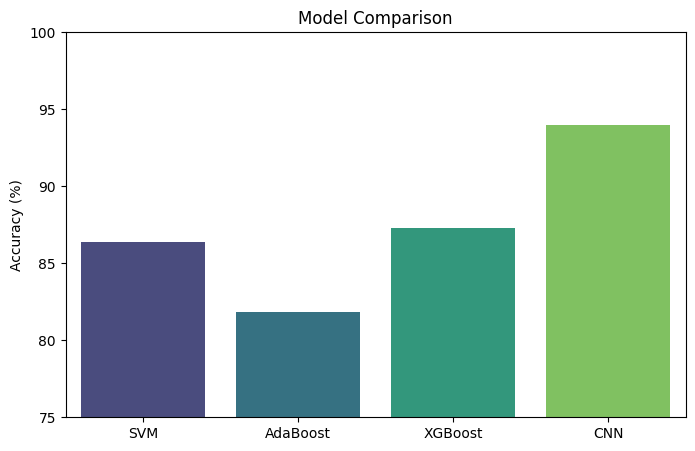

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Models and their corresponding accuracy values
models = ["SVM", "AdaBoost", "XGBoost", "CNN"]
accuracies = [86.36, 81.82, 87.27, 94.0]  # Converted to percentages

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(75, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.show()
